# (SCTP) Associate Data Analyst - Capstone Project 
## Predictive Analytics on Healthcare dataset.

## Problem Statement:
Heart disease is a leading cause of mortality worldwide. Early
detection and accurate prediction of heart disease can significantly
improve patient outcomes by enabling timely intervention and
preventive measures. The objective of this project is to develop a
machine learning model that can effectively predict the presence or
absence of heart disease based on various medical and lifestyle
factors.

## Research Objective:
The goal of this project is to build a predictive model that can
accurately classify individuals as either having or not having heart
disease. By analysing a comprehensive set of patient attributes,
including demographic, clinical, and lifestyle factors, the model aims
to identify patterns and features indicative of the presence or
absence of heart disease.

### Project Objective:
Build a machine learning model that can predict risk of heart disease (`disease` = 1) from the provided demographic, clinical and lifestyle factors that can be utilized in a clinical setting.

This notebook will document the steps and development of the model for the Capstone Project.  

## Phase 1: Data Understanding and Preperation

This phase will focus on understanding the data and prepare it for modeling.

**Goal**: Ensure that the dataset is clean and ready for analysis.

### 1.1: Loading the Data
Import libraries and load the data:

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# loading the data.
df = pd.read_csv('cardio_data.csv')

# checking row and column count as well as the first 5 rows.
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Shape: (70000, 16)

First 5 rows:


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


### 1.2: Initial Inspection and Observation of Data
Initial look into the data:

In [2]:
# check data type and any missing values.
print("\nBasic Info:")
df.info()

# check for outliers
print("\nSummary Statistics:")
display(df.describe())  

# check for class distribution of target variable.
print("\nTarget Variable - Class Distribution:")
print(df['disease'].value_counts())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB

Summary Statistics:


,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690,0.499700
std,28851.302323,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757,0.500003
min,0.000000,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000



Target Variable - Class Distribution:
disease
0    35021
1    34979
Name: count, dtype: int64


#### Initial Observation:
- No missing or null values.
- `date` stored as Text.
- `age` stored in days as per description from metadata and not in years.
- `height` value is 'DAYS' as per metadata, however, likely to be a typo and values are in Centimeters.
- `height`, `weight`, `ap_hi` & `ap_lo` appear to have outliers outside of physiological possibility.
- Target Variable `disease` is almost perfectly balanced.

**Changes required:** 
- Convert `date` to datetime format.
- Convert `age` from days to years
- Remove unrealistic physiological values and keep the valid range below:
    - `height`: 120cm - 220cm.
    - `Weight`: 30kg to 200kg.
    - Blood Pressure:
        - `ap_hi` (Systolic): 60 - 250 mmHg.
        - `ap_lo` (Diastolic): 40 - 150 mmHg

> Values for `height`, `weight` & Blood Pressure are based on WHO-compliant ranges for all 4 countries.

### 1.3: Data Cleaning
Cleaning of data based on the changes required:

In [3]:
# Convert data types

# convert to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')  
# convert days to years
df['age'] = round(df['age'] / 365, 1)  

# Remove outliers based on earlier defined range
clean_df = df[
    (df['height'].between(120, 220)) &
    (df['weight'].between(30, 200)) &
    (df['ap_hi'].between(60, 250)) &
    (df['ap_lo'].between(40, 150))
]

print(f"Original records: {len(df)}")
print(f"Records removed: {len(df) - len(clean_df)}")
print(f"Records kept: {len(clean_df)} ({len(clean_df)/len(df)*100:.1f}%)\n")

Original records: 70000
Records removed: 1301
Records kept: 68699 (98.1%)



**Result**:
- 1.9% of records are removed after data cleaning, 98.1% of data still intact.
- `date` & `age` are converted to the correct format.
- Range for `height`, `weight`, `ap_hi` & `ap_lo` now at valid range.

### 1.4: Exploratory Data Analysis (EDA)
Initial Data Overview:

In [4]:
# print stats of cleaned data
clean_df.describe()

,date,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,68699,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000
mean,2020-07-01 13:54:46.318578176,49970.324037,0.803330,53.327600,0.053567,126.614361,81.356512,1.364765,1.348768,1.225986,164.413994,0.088036,74.118152,0.494796
min,2018-01-01 00:00:00,0.000000,0.000000,29.600000,0.000000,60.000000,40.000000,1.000000,1.000000,1.000000,120.000000,0.000000,30.000000,0.000000
25%,2019-04-04 00:00:00,24996.500000,1.000000,48.400000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,2020-06-30 00:00:00,50012.000000,1.000000,54.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,2021-10-01 00:00:00,74860.500000,1.000000,58.400000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,2023-01-01 00:00:00,99999.000000,1.000000,65.000000,1.000000,240.000000,150.000000,3.000000,2.000000,3.000000,207.000000,1.000000,200.000000,1.000000
std,NaN,28845.909814,0.397483,6.761439,0.225163,16.743837,9.554414,0.678997,0.476584,0.571945,7.914499,0.283350,14.296075,0.499977


#### Key Demographic Insights:
- `age` covers a range of 30 to 65 years ogage, while the average patient is 54 years old. As heart disease risk starts to increase after the age of 45, this is a good range for heart disease analysis.
- `height` & `weight` have a more realistic range of values, but still have some extreme outliers that might be due to rare medical cases like dwarfism or extreme obesity. Consider using the values to calculate BMI.
- `ap_hi` normal range is < 120 according to WHO standard and according to the statistics, 25% of the patients are above 140, which means that they have hypertension.
- `cholesterol` level for 25% of the patients is above 2, which means that they have elevated cholesterol, which has a direct relation to heart disease risk.

### 1.5: Feature Engineering
Using `height` & `weight` to create a `bmi` column: 

In [5]:
# formula for bmi = weight / (height/100)**2.
clean_df['bmi'] = clean_df['weight'] / (clean_df['height']/100)**2

# categorize `bmi` into bins based off WHO threshold.
clean_df['bmi_category'] = pd.cut(clean_df['bmi'],
                                bins=[0, 18.5, 25, 30, 100],
                                labels=['Under Weight', 'Normal Weight', 'Over Weight', 'Obese'])
# print `bmi` stats.
print("BMI Summary Stats:")
print(clean_df['bmi'].describe())
print("\nCategory Counts:")
print(clean_df['bmi_category'].value_counts())

BMI Summary Stats:
count    68699.000000
mean        27.458482
std          5.256925
min         10.726644
25%         23.875115
50%         26.346494
75%         30.116213
max        108.169847
Name: bmi, dtype: float64

Category Counts:
bmi_category
Normal Weight    25463
Over Weight      24649
Obese            17949
Under Weight       636
Name: count, dtype: int64


With `bmi` column created we can procceed to conduct visualization exploration to determine which feature to include during the modeling phase.

### 1.6: Visualization Exploration
Visualization for different demographic against `disease`.

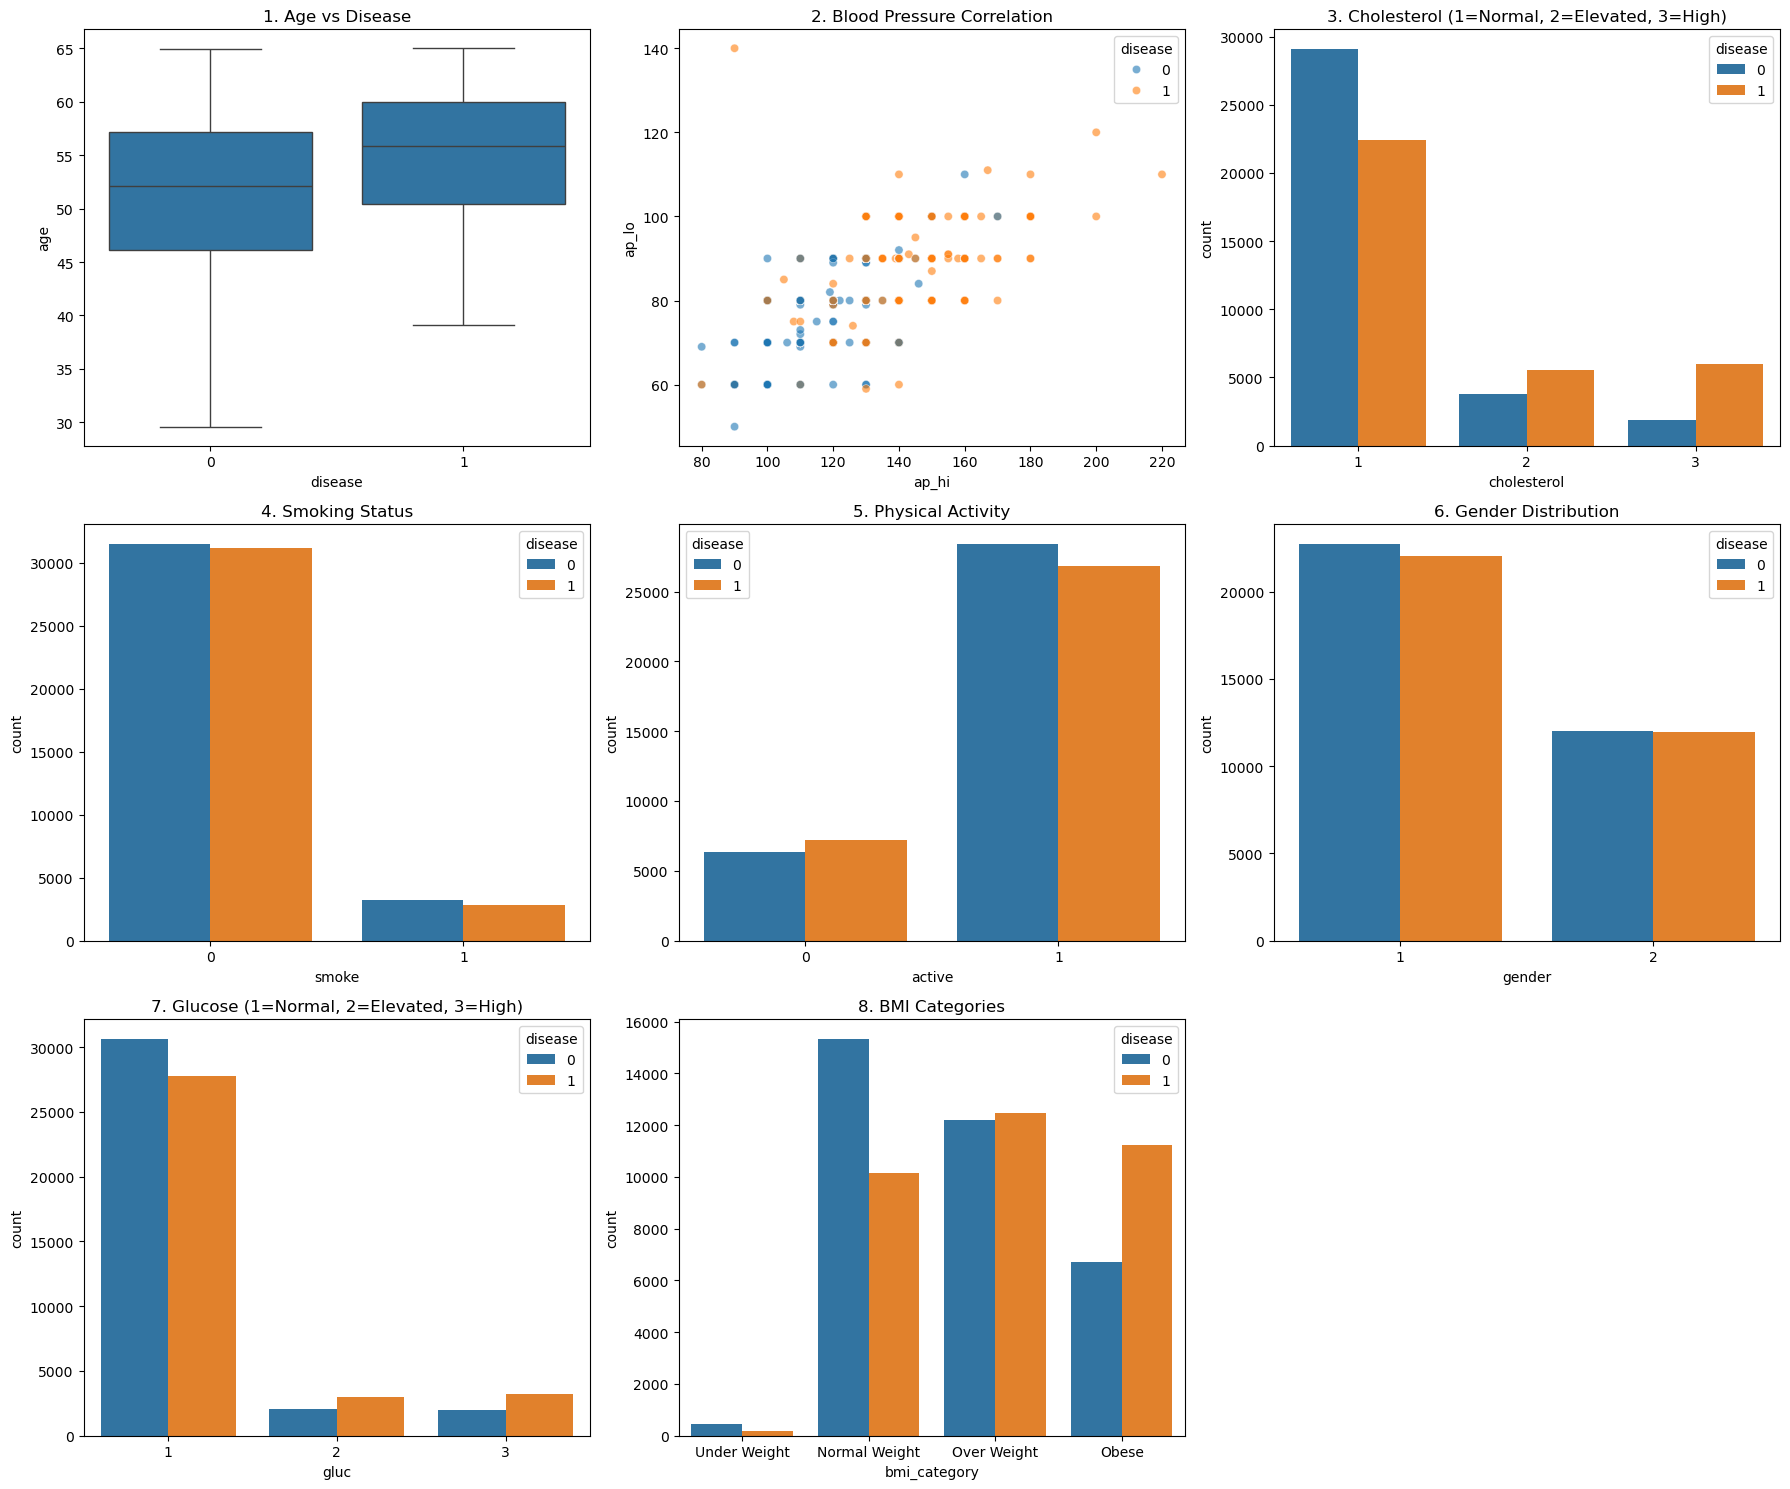

In [6]:
# setting up 6-panel visualization.
plt.figure(figsize=(18, 15))

# `age` vs `disease`.
plt.subplot(3, 3, 1)
sns.boxplot(x='disease', y='age', data=clean_df)
plt.title("1. Age vs Disease")

# blood pressure vs `disease`.
plt.subplot(3, 3, 2)
sns.scatterplot(x='ap_hi', y='ap_lo', hue='disease', data=clean_df.sample(1000), alpha=0.6)
plt.title("2. Blood Pressure Correlation")

# `cholesterol` vs `disease`
plt.subplot(3, 3, 3)
sns.countplot(x='cholesterol', hue='disease', data=clean_df)
plt.title("3. Cholesterol (1=Normal, 2=Elevated, 3=High)")

# `smoke` vs `disease`
plt.subplot(3, 3, 4)
sns.countplot(x='smoke', hue='disease', data=clean_df)
plt.title("4. Smoking Status")

# `active` vs `disease`
plt.subplot(3, 3, 5)
sns.countplot(x='active', hue='disease', data=clean_df)
plt.title("5. Physical Activity")

# `gender` vs `disease`
plt.subplot(3, 3, 6)
sns.countplot(x='gender', hue='disease', data=clean_df)
plt.title("6. Gender Distribution")

# `glucose` vs `disease`
plt.subplot(3, 3, 7)
sns.countplot(x='gluc', hue='disease', data=clean_df, order=[1,2,3])
plt.title("7. Glucose (1=Normal, 2=Elevated, 3=High)")

# `bmi` vs `disease`
plt.subplot(3, 3, 8)
sns.countplot(x='bmi_category', hue='disease', data=clean_df, 
             order=['Under Weight', 'Normal Weight', 'Over Weight', 'Obese'])
plt.title("8. BMI Categories")

plt.tight_layout()
plt.show()

### 1.7: Visualization Observation:
- Age vs Disease:
    - Risk of heart disease starts rising at around age 40.
    - Once a patient is over 55, the risk of contracting heart disease is even higher.
- BP Correlation:
    - Orange dots are clustered at the top right quardrant which indicates that heart disease risk rises with higher BP.
    - Blue dots are mostly below 140/90 mmHg which conforms to the clinical threshold.
- Cholesterol Impact:
    - At level 3, a significantly larger amount of patients who have heart disease.
    - At level 2, there is a large increase in risk as compared to level 1.
- Smoking Status:
    - Smoking does not seem to impact risk of heart disease.
    - Possible for this insight could be due to patients withholding the truth.
- Physical Activity:
    - Being active seem to have minimal impact on risk as well, with a slight increase/decrease in risk if a patient is active or inactive.
- Gender Distribution:
    - Assumed 1 = Male, 2 = Female
    - Male shows a lower heart disease risk than Female whom are showing a 50/50 risk chance.
    - Based on statistics, Males have higher heart disease risk than their Female counterpart.
    - Require more investigation into whether gender tag is reversed.
- Glucose vs Disease:
    - At elevated level of glucose, the risk of heart disease starts to increase.
    - At high level of glucose, the risk increases even more.
- BMI vs Disease:
    - At normal and even under weight, patients are at lower risk of heart disease.
    - Once over weight, the risk of heart disease starts to rise.
    - Patients in the obese range are almost 2 times more likely to contract heart disease.

### Key Takeaways from EDA Visualizations  
- Strongest Predictors: Age, BP, Cholesterol, Glucose and BMI. 
- Weak Predictors: Smoking, Activity.  
- Data Issue: Gender labels are likely to be wrongly assumed.

### Addressing Gender Label Issue
Using average height/weight as well as if the patients are smokers to check against the gender labels to compare to gender statistics:

In [7]:
# Check average height/weight by gender labels
display(clean_df.groupby('gender').agg({'height':'mean', 'weight':'mean', 'smoke':'mean'}))

,height,weight,smoke
gender,,,
1,161.421377,72.477489,0.01777
2,170.001920,77.181657,0.21924


According to WHO standards:

| Gender     | Avg Height (cm) | Avg Weight (kg) | Smoking Rate | 
|------------|-----------------|-----------------|--------------|
| **Male**   |     170-175     |     70-80       |    Higher    | 
| **Female** |     155-165     |     50-65       |    Lower     | 

**Conclusion:**
Based on the output, confirmed that 1 = Female & 2 = Male.

### Gender Label Mapping
Gender labels will be mapped to reflect the correct gender:

In [8]:
# swap and map the labels to the correct gender
clean_df['gender'] = clean_df['gender'].map({1: 'Female', 2: 'Male'})

print("Stats after Gender Mapping:")
display(clean_df.groupby('gender').agg({'height':'mean', 'weight':'mean', 'smoke':'mean'}))

Stats after Gender Mapping:


,height,weight,smoke
gender,,,
Female,161.421377,72.477489,0.01777
Male,170.001920,77.181657,0.21924


### 1.8: Exploratory Data Analysis Summary

Key Insights:

Key Predictors (to be included in the modeling phase):
- `age`: Strong predictor which shows clear increase of risk with rising age.
- `ap_hi`: Obvious cluttering of risk beyond 140/90 mmHg mark.
- `cholesterol`: Level 2 & 3 show a sharp increase in risk, especially level 3 which is higher than 50%.
- `gluc`: Level 2 & 3 shows increase of risk, while not as high as cholesterol, is still a good predictor to include in the modeling phase.
- `bmi`: Risk increases once a patient is over weight and the risk rises by almost 2 times once obese.

Weak Predictors:
- `smoking`, `active` & `gender`: Does not impact risk as much as initially thought.

## Phase 2: Modeling

This phase will focus on training models to accurately predict risk of heart disease.

Goal: To select a model that can most accurately predict heart disease risk.

### 2.1: Preprocessing

Predictors will be preprocessed into standard scalers so that the models can learn better from the processed data. This process will include:
- Selecting the Key Predictors and Target and define on to X and y.
- Train-Test split: Split data into training and testing groups for machine learning. We will use `stratify=y` to preserve class distribution.
- Categorical Encoding: Encode Ordinal features like `cholesterol` and `gluc`.
- Feature Scaling: Standardize numerical features like `age`, `ap_hi` & `bmi`.

In [9]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score
import pandas as pd

X = clean_df[['age', 'ap_hi', 'cholesterol', 'gluc', 'bmi']]
y = clean_df['disease']

# split data using Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# encode categorical ordinal features safely
ord_enc = OrdinalEncoder()
X_train.loc[:, ['cholesterol', 'gluc']] = ord_enc.fit_transform(X_train[['cholesterol', 'gluc']])
X_test.loc[:, ['cholesterol', 'gluc']] = ord_enc.transform(X_test[['cholesterol', 'gluc']])

# scale numerical features safely
scaler = StandardScaler()
num_cols = ['age', 'ap_hi', 'bmi']
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

In [10]:
clean_df.to_csv("clean_df.csv", index=False)

### 2.2: Modeling and Comparative Analysis

Commence modeling with the following models:
- Logistic Regression (Base Model)
- Random Forest Classifier
- K Neightbours Classifier

Conduct Comparative Analysis using result of all 3 models.

### Logistic Regression

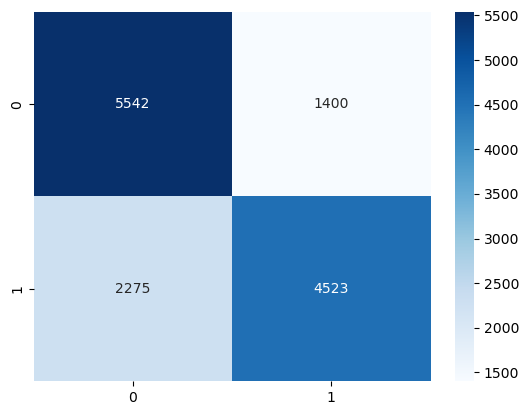


Accuracy: 73.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6942
           1       0.76      0.67      0.71      6798

    accuracy                           0.73     13740
   macro avg       0.74      0.73      0.73     13740
weighted avg       0.74      0.73      0.73     13740

Accuracy: 71.58%

LR (Threshold=0.4):
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      6942
           1       0.68      0.80      0.74      6798

    accuracy                           0.72     13740
   macro avg       0.72      0.72      0.71     13740
weighted avg       0.72      0.72      0.71     13740

Accuracy: 64.98%

LR (Threshold=0.3):
              precision    recall  f1-score   support

           0       0.82      0.39      0.53      6942
           1       0.60      0.91      0.72      6798

    accuracy                           0.65     13740
   macro a

In [11]:
# training the LR model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
lr.fit(X_train, y_train)

# testing the model with test set.
y_pred_lr = lr.predict(X_test)

# Confusion Matrix.
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.show()

# printing the report.
from sklearn.metrics import accuracy_score, classification_report
    
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuracy: {acc_lr:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# threshold tuning 
y_proba_lr = lr.predict_proba(X_test)[:, 1]
for threshold in [0.4, 0.3]:  
    y_pred_tuned = (y_proba_lr >= threshold).astype(int)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2%}")
    print(f"\nLR (Threshold={threshold}):")
    print(classification_report(y_test, y_pred_tuned))

### Logistic Regression Result Observation

#### Based on the classification report:

| Threshold | Recall (No Disease) | Recall (Heart Disease) | False Alarm Rate | Missed Cases Rate |
|-----------|---------------------|------------------------|------------------|-------------------|
| 0.5       | 80%                 | 67%                    | 20%              | 33%               |
| 0.4       | 64%                 | 80%                    | 36%              | 20%               |
| 0.3       | 39%                 | 91%                    | 61%              | 9%                |

This model have been tested on 3 different thresholds and the result is as above. Based on the returns, a threshold of 0.4 is the most ideal setting as it achieved a high recall of 80% in risk detection while keeping false alarms at 36%. However, in a medical screening, a threshold of 0.3 can be considered as it will miss only 9% of true cases at the cost of 61% more false alarms.

### Random Forest Classifier

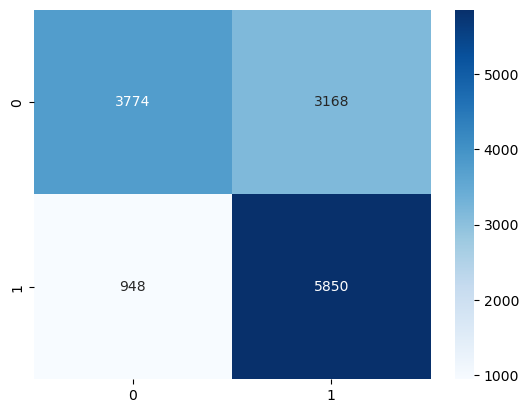

In [12]:
# training the RT model.
from sklearn.ensemble import RandomForestClassifier

# class_weight set to prioritize detection of heart disease over false alarm.
rf = RandomForestClassifier(class_weight={0:1, 1:2}, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# testing the model with test set.
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.show()

# printing the report.
acc_rf = accuracy_score(y_test, y_pred_rf)

### Random Forest Result Observation

#### Based on the classification report:
This model has its class weight set to prioritize risk detection and thus has a high recall rate of 86% risk detection rate at the cost of a 46% chance of false alarm. In a medical screening, this is a good trade-off as having 54% more false alarms over missing 14% of true cases is much more preferable. However, in a diagnostic setting, the high volume of false alarm might be overwhelming.

### K Neighbours Classifier (KNN)

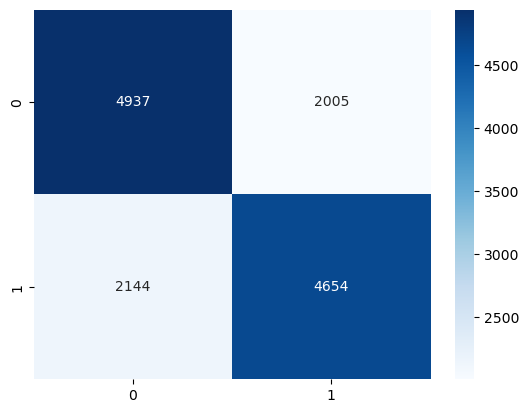

Accuracy: 69.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6942
           1       0.70      0.68      0.69      6798

    accuracy                           0.70     13740
   macro avg       0.70      0.70      0.70     13740
weighted avg       0.70      0.70      0.70     13740



In [13]:
# training the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# testing the model with test set.
y_pred_knn = knn.predict(X_test)

# Confusion Matrix.
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.show()

# printing the report.
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy: {acc_knn:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

### K Neighbours Classifier Result Observation

#### Based on the classification report:
This model has a recall rate of 68% for risk detection and 71% for healthy patients. The results are balanced and average but in a clinical screening setting, missing 32% of real cases is not ideal.

### 2.3: Final Model Comparative Analysis

| Model               | Threshold | Recall (Risk) | Recall (Healthy) | False Alarm Rate | Accuracy |
|---------------------|-----------|---------------|-------------------|------------------|----------|
| Logistic Regression | 0.5       | 67%           | 80%              | 20%              | 73.25%   |
| Logistic Regression | 0.4       | 80%           | 64%              | 36%              | 71.58%   |
| Logistic Regression | 0.3       | 91%           | 39%              | 61%              | 64.98%   |
| Random Forest       | -         | 86%           | 54%              | 46%              | 70.04%   |
| K-Nearest Neighbors | -         | 68%           | 71%              | 29%              | 69.80%   |

Based on the above result:
- LR (0.5) model: Select if normal clinic setting.
- LR (0.4) model: Select if routine screening for heart disease risk, good rate of detection while keeping false alarms at an acceptable range.
- LR (0.3) model: Select if screening setting for high-risk patients. High rate of detection at the cost of high false alarms, but missing only 9% of real cases.
- RF model: Good detection rate with a moderate amount of false alarms. Select if used as a secondary screening for high-risk patients.
- KNN model: Moderate risk detection vs false alarm. May be used in conjunction with LR (0.5) model. 

## Phase 3: Selection, Recommendation & Conclusion

This phase will focus on presenting the selected risk prediction model and delivering recommendations for its implementation in a clinical setting.

Goal: To select a predictive model based on its ability to predict risk and to propose implementation steps and future enhancements.

### 3.1: Final Model Selection

#### Selected Model:
Logistic Regression (Threshold=0.4)

This model is selected due to:
- Accuracy of Risk Prediction:
    - Correctly predict 8 out of 10 true heart disease cases. (Recall rate of 80% for risk detection)
- Acceptable False Alert rates:
    - 4 out of 10 healthy patients flagged as false positive, acceptable trade-off rates. (Recall rate of 62% for healthy cases)
- Instant Result:
    - Results are out in less than 1 second during routine checkup/screening, saving valuable man-hours.


### 3.2: Heart Health Assessment Tool

A simple clinical tool to screen patients for heart disease risk during routine check-ups.

**Tool Overview**:
- Nurses enters patient's health details.
- Tool calculates risk with trained model.
- Output risk level as well as health alerts and recommended next steps.
  
**Key Features**:
- User-friendly interface with simple input prompts.
- Instant results. (Less than 5 seconds)
- Customized health alerts.
- Clear and actionable next step instructions.

#### Model Implementation

In [15]:
# define features for X and y
X = clean_df[['age', 'ap_hi', 'cholesterol', 'gluc', 'bmi']]
y = clean_df['disease']

# split data using Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode ordinal categorical features
ord_enc = OrdinalEncoder()
X_train.loc[:, ['cholesterol', 'gluc']] = ord_enc.fit_transform(X_train[['cholesterol', 'gluc']])
X_test.loc[:, ['cholesterol', 'gluc']] = ord_enc.transform(X_test[['cholesterol', 'gluc']])

# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'ap_hi', 'bmi']
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])

# Train final model
final_model = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
final_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [16]:
def heart_health_assessment():
    print(
'''
 ---------------------------------------------------------------------------
         _   _                 _     _   _            _ _   _     
        | | | | ___  __ _ _ __| |_  | | | | ___  __ _| | |_| |__  
        | |_| |/ _ \/ _` | '__| __| | |_| |/ _ \/ _` | | __| '_ \ 
        |  _  |  __/ (_| | |  | |_  |  _  |  __/ (_| | | |_| | | |
        |_| |_|\___|\__,_|_|   \__| |_| |_|\___|\__,_|_|\__|_| |_|
            / \   ___ ___  ___  ___ ___ _ __ ___   ___ _ __ | |_   
           / _ \ / __/ __|/ _ \/ __/ __| '_ ` _ \ / _ \ '_ \| __|  
          / ___ \\__ \__ \  __/\__ \__ \ | | | | |  __/ | | | |_   
         /_/   \_\___/___/\___||___/___/_| |_| |_|\___|_| |_|\__|
                                                           
 ---------------------------------------------------------------------------
''')

    # user inputs.
    age = int(input("Age (years): "))
    bp = int(input("Blood pressure (mmHg): "))
    chol = int(input("Cholesterol level (1 = Normal, 2= Elevated, 3 = High): "))
    glucose = int(input("Blood sugar level (1 = Normal, 2= Elevated, 3 = High): "))
    bmi = float(input("BMI: "))

    # frame user input into model format with exact column/name order.
    patient_df = pd.DataFrame([{
        'age': age,
        'ap_hi': bp,
        'cholesterol': chol,
        'gluc': glucose,
        'bmi': bmi
    }])

    # ordinal encoding for user entered values.
    patient_df[['cholesterol', 'gluc']] = ord_enc.transform(patient_df[['cholesterol', 'gluc']])

    # scaling for user entered values.
    num_cols = ['age', 'ap_hi', 'bmi']
    patient_df[num_cols] = scaler.transform(patient_df[num_cols])
    
    # prediction model based on user input.
    proba = final_model.predict_proba(patient_df)[0][1]
    
    # defining the risk tiers.
    if proba < 0.3:
        risk_label = "Low Risk"
    elif proba < 0.4:
        risk_label = "Elevated Risk"
    elif proba < 0.6:
        risk_label = "Moderate Risk"
    else:
        risk_label = "High Risk"

    # report result view.
    print("\n" + "="*75)
    print("HEART HEALTH ASSESSMENT RESULTS")
    print("="*75)

    print(f"\nHEART DISEASE RISK: {risk_label}")
    
    # health alerts.
    alerts = []
    if bp > 130:
        alerts.append(f"Elevated blood pressure ({bp} mmHg) - Optimal is below 120")
    if bp > 140:
        alerts[-1] += ", consult doctor immediately"
    
    if chol == 2:
        alerts.append("Elevated cholesterol - Dietary changes may help improve levels")
    if chol == 3:
        alerts.append("High cholesterol - Medical evaluation recommended")

    if glucose == 2:
        alerts.append("Elevated blood sugar - Monitor sugar/carb intake")
    if glucose == 3:
        alerts.append("High blood sugar - Further evaluation for diabetes recommended")

    if bmi >= 25:
        alerts.append(f"BMI: {bmi:.1f} (Healthy range: 18.5-24.9)")
    if bmi >= 30:
        alerts[-1] += (" - Doctor consultation advised")
    
    # print health alerts.
    if alerts:
        print("\nHEALTH NOTICES:")
        for item in alerts:
            print(f"- {item}")
    else:
        print("\nAll health markers within normal ranges")

    # print recommendation according to risk level.
    print("\nRECOMMENDED ACTIONS:")
    if risk_label == "High Risk":
        print("- Schedule doctor appointment immediately")
        print("- ECG required if presented with chest pain")
        if bp > 140 or chol == 3 or glucose == 3:
            print("- Conduct test on Cholesterol/Blood Sugar")
    elif risk_label == "Moderate Risk":
        print("- Schedule doctor appointment within 2 weeks")
        if bp > 140 or chol == 3 or glucose == 3:
            print("- Conduct test on Cholesterol/Blood Sugar")
    elif risk_label == "Elevated Risk":    
        print("- Regular monitoring and lifestyle changes advised")
        print("- Consider consulting healthcare provider")
        print("- Recommended follow-up health check in 3 months time")
    else:
        print("- Annual heart health check recommended")

    if bp > 130 or chol >= 2 or glucose >= 2 or bmi >= 25:
        print("- Lifestyle adjustments would be beneficial")

    print("\n" + "="*75)

#### Example: Patient Assessment

In [21]:
heart_health_assessment()


 ---------------------------------------------------------------------------
         _   _                 _     _   _            _ _   _     
        | | | | ___  __ _ _ __| |_  | | | | ___  __ _| | |_| |__  
        | |_| |/ _ \/ _` | '__| __| | |_| |/ _ \/ _` | | __| '_ \ 
        |  _  |  __/ (_| | |  | |_  |  _  |  __/ (_| | | |_| | | |
        |_| |_|\___|\__,_|_|   \__| |_| |_|\___|\__,_|_|\__|_| |_|
            / \   ___ ___  ___  ___ ___ _ __ ___   ___ _ __ | |_   
           / _ \ / __/ __|/ _ \/ __/ __| '_ ` _ \ / _ \ '_ \| __|  
          / ___ \__ \__ \  __/\__ \__ \ | | | | |  __/ | | | |_   
         /_/   \_\___/___/\___||___/___/_| |_| |_|\___|_| |_|\__|
                                                           
 ---------------------------------------------------------------------------



Age (years):  55
Blood pressure (mmHg):  140
Cholesterol level (1 = Normal, 2= Elevated, 3 = High):  2
Blood sugar level (1 = Normal, 2= Elevated, 3 = High):  3
BMI:  25



HEART HEALTH ASSESSMENT RESULTS

HEART DISEASE RISK: High Risk

HEALTH NOTICES:
- Elevated blood pressure (140 mmHg) - Optimal is below 120
- Elevated cholesterol - Dietary changes may help improve levels
- High blood sugar - Further evaluation for diabetes recommended
- BMI: 25.0 (Healthy range: 18.5-24.9)

RECOMMENDED ACTIONS:
- Schedule doctor appointment immediately
- ECG required if presented with chest pain
- Conduct test on Cholesterol/Blood Sugar
- Lifestyle adjustments would be beneficial



### 3.3: Clinical Implementation Roadmap

#### Stage 1: Staff training (1 hour)
- **Vitals input**: Entering the vitals in the correct format.
- **Result Interpretation**: Understanding results, alerts, and next step recommendations.
- **Handling 'False' Alerts**: Trust or overwrite the tool's alert and recommendation based on staff's clinical judgements.
- **Hands-on session**: Simulate real scenarios and gather feedback.

#### Stage 2: Trial Run (4 - 6 Weeks)
- **Location**:
    - 2 or more pilot clinics.
- **Data to Track**:
    - Time saved per screening.
    - Early detection of high risk cases.
    - Staff satisfaction feedback.

#### Stage 3: Success Criteria and Rollout Decision:

**Success Criteria**:
1. Time saved: reduction of time spent per patient by at least 50%.
2. Risk Detection Rate:  75% of real cases detected.
3. Staff Satisfaction: 80 or above staff approval.

- **Meets Targets**: Full rollout with Electronic Health Records (EHR) integration
- **Below Targets**: Adjust threshold, retrain, and retest model.


**Workflow Visualization**:

```mermaid
graph TD
A[Patient Check-in] --> B[Nurse Enters Vitals]
B --> C{Heart Health Assessment}
C -->|High Risk| D[Alerts Doctor]
C -->|Moderate/Low Risk| E[Routine Check]
D --> F[Urgent Tests]
E --> G[Preventive Advice]
```

### 3.4: Model Limitations

The selected model, while able to detect the risk of heart disease reasonably well, does have several limitations:

- **Missing Key Predictors**: Important information such as family history, ECG result, or lifestyle details, which are not available in the dataset.

- **Data Reliability**: Features such as smoking or physical activeness was included in the dataset but EDA reveals that they are not impactful to the analysis. This may be due to patients underreporting.

- **Updates Required**: Once deployed, the model needs to be retrained with new data to improve. Over time, the model will become outdated with changes in medical trend and patient profiles.

- **Prediction, not diagnosis**: The model predicts and flag out patients with high risk of heart disease, not confirm a diagnosis. It is there to support and not replace medical professionals.

These limitations remind us that predictive models are tools that help improve current healthcare workflows and not a solution by itself.

### 3.5 Future Enhancements

While the model is currently performing as intended, there are several ways it could be improved and expanded in the future:

- **Include More Predictors**: Adding more medical data such as family history, ECG results, or detailed lifestyle patterns could improve the model’s prediction accuracy.

- **Retrain with Feedback**: As the tool is used, the results can be collected and reused to retrain the model regularly so that it improves over time as more data is collected.

- **Mobile App Version**: A simple mobile-friendly version could be developed for use as a self-check tool for patients before visiting a doctor. This could reduce screening time even more and help with early risk identification, even at home.

- **Long-Term Integration**: The tool could be connected to visual dashboards or patient databases to automatically retrieve vitals, show alerts, and assist in day-to-day operations in real time.

With these enhancements, this tool has the potential to be fully integrated into clinic workflows and become a valuable support for healthcare staff.


# Final Conclusion

The objective of this Capstone Project was to create a predictive model that can accurately predict the risk of heart disease. With the knowledge gained from the courses and additional research, I carried out data cleaning, analysis, machine learning, and a working model was successfully created.

The final model is a simple Logistic Regression model with a tuned threshold that has a good balance of accuracy and recall for risk prediction. While not meant to replace professional medical decisions, with future enhancements, the model could become a useful tool to improve clinical workflow and potentially help save lives through early detection.

This project has shown me how data analytics, even at a basic level, can be shaped into something real and useful.